In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
%matplotlib inline

In [19]:
data = pd.read_csv("/Users/ashlyn20/Documents/学习/NYU/DSbootcamp/Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project.csv")

### 1)Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

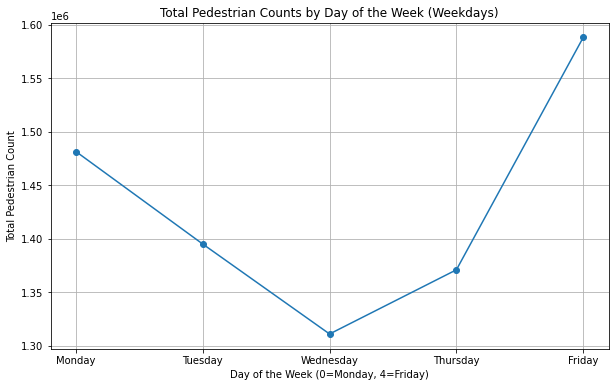

In [20]:
# Convert 'hour_beginning' to datetime format
data['hour_beginning'] = pd.to_datetime(data['hour_beginning'])

# Extract the day of the week (Monday=0, Sunday=6)
data['day_of_week'] = data['hour_beginning'].dt.dayofweek

# Filter for weekdays
data_weekdays = data[data['day_of_week'] < 5]

# Aggregate pedestrian counts by day of the week
# Summing the 'Pedestrians' column to get the total counts for each weekday
weekday_pedestrian_counts = data_weekdays.groupby('day_of_week')['Pedestrians'].sum()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(weekday_pedestrian_counts.index, weekday_pedestrian_counts.values, marker='o', linestyle='-')
plt.title('Total Pedestrian Counts by Day of the Week (Weekdays)')
plt.xlabel('Day of the Week (0=Monday, 4=Friday)')
plt.ylabel('Total Pedestrian Count')
plt.xticks(range(5), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])  # Set custom x-axis labels
plt.grid(True)
plt.show()

### 2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.


In [21]:
# Filter for records from the year 2019
data_2019 = data[data['hour_beginning'].dt.year == 2019]

# Group by weather summary and calculate the total pedestrian counts for each weather condition
weather_pedestrian_counts = data_2019.groupby('weather_summary')['Pedestrians'].sum().sort_values(ascending=False)

# For a more detailed analysis, we'll also look at average temperature and precipitation for each weather summary
weather_conditions = data_2019.groupby('weather_summary').agg({
    'Pedestrians': 'sum',
    'temperature': 'mean',
    'precipitation': 'mean'
}).sort_values(by='Pedestrians', ascending=False)

weather_conditions

,Pedestrians,temperature,precipitation
weather_summary,,,
partly-cloudy-day,2790868,66.173717,0.000176
clear-day,1953025,55.523708,0.000062
cloudy,984867,52.075014,0.001302
rain,139502,53.911038,0.056557
partly-cloudy-night,63794,55.425145,0.000251
clear-night,61815,47.605376,0.000010
snow,8460,31.763158,0.024713
fog,4673,45.454545,0.005032
wind,2716,51.000000,0.000575



### 3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [22]:
# Define the custom function to categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'hour_beginning' column to create a new 'time_of_day_category' column
data['time_of_day_category'] = data['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Group by the new 'time_of_day_category' column and sum pedestrian counts
time_of_day_pedestrian_counts = data.groupby('time_of_day_category')['Pedestrians'].sum()

# Sorting the counts to ensure the order follows a typical day's cycle
time_of_day_pedestrian_counts = time_of_day_pedestrian_counts.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

time_of_day_pedestrian_counts


time_of_day_category
Morning      2480582
Afternoon    5852025
Evening      2432145
Night         268114
Name: Pedestrians, dtype: int64